In [4]:
import os

import numpy as np
import matplotlib.pyplot as plt
import jax
import jax.numpy as jnp

from fiesta.inference.prior import Uniform, Constraint, LogUniform
from fiesta.inference.prior_dict import ConstrainedPrior
from fiesta.inference.fiesta import Fiesta
from fiesta.inference.likelihood import EMLikelihood
from fiesta.inference.lightcurve_model import AfterglowFlux
from fiesta.inference.injection import InjectionAfterglowpy

In [21]:
#########
# MODEL #
#########

FILTERS = ["radio-6GHz", "besselli", "bessellv", "uvot::b", "X-ray-5keV"]
model = AfterglowFlux(name="afgpy_gaussian_CVAE",
                      filters = FILTERS)

14:33 fiesta INFO    : Loading surrogate afgpy_gaussian_CVAE. This surrogate should only be used in the following parameter ranges:
14:33 fiesta INFO    : 	 inclination_EM: (0, 1.5707963267948966)
14:33 fiesta INFO    : 	 log10_E0: (47, 57)
14:33 fiesta INFO    : 	 thetaCore: (0.01, 0.6283185307179586)
14:33 fiesta INFO    : 	 alphaWing: (0.2, 3.5)
14:33 fiesta INFO    : 	 log10_n0: (-6, 2)
14:33 fiesta INFO    : 	 p: (2.01, 3)
14:33 fiesta INFO    : 	 log10_epsilon_e: (-4, 0)
14:33 fiesta INFO    : 	 log10_epsilon_B: (-8, 0)
14:33 fiesta INFO    : Surrogate afgpy_gaussian_CVAE is loading with the following filters: ['radio-6GHz', 'besselli', 'bessellv', 'uvot::b', 'X-ray-5keV'].
14:33 fiesta INFO    : Loaded for surrogate afgpy_gaussian_CVAE from /nfs/aya/work/hkoehn/fiesta/fiesta/src/fiesta/surrogates/GRB/afgpy_gaussian_CVAE/model.


In [22]:
params = [2.319224774837493896e-01, 5.276507949829101562e+01, 4.946123808622360229e-02, 3.453652620315551758e+00, -4.923582077026367188e+00, 2.649291992187500000e+00, -6.116514205932617188e-01, -2.575401306152343750e+00]

params = {p: val for p, val in zip(model.parameter_names, params)}
params["redshift"] = 0
params["luminosity_distance"] = 40.0


injection = InjectionAfterglowpy(jet_type=0, 
                                 filters=FILTERS, 
                                 N_datapoints=75, 
                                 error_budget=0.2, 
                                 tmin=1e-2,
                                 tmax=200, 
                                 trigger_time=58849.)

time_afgpy, true_lc = injection._get_injection_lc(params)
time_fiesta, predict_lc = model.predict(params)

14:33 fiesta INFO    : Creating injection with filters: ['radio-6GHz', 'besselli', 'bessellv', 'uvot::b', 'X-ray-5keV']


(40.0, 20.0)

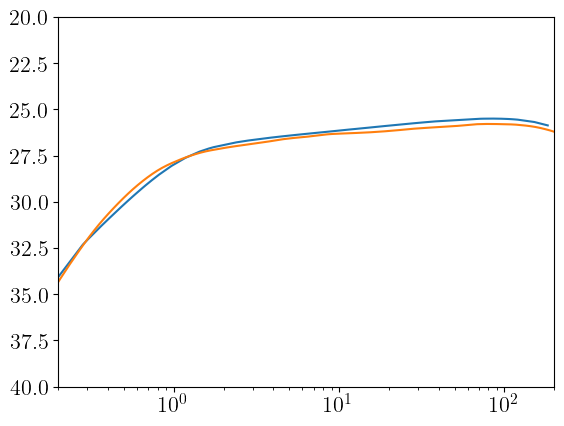

In [23]:
plt.plot(time_afgpy, true_lc["bessellv"])

plt.plot(time_fiesta, predict_lc["bessellv"])
plt.xscale("log")
plt.xlim(0.2, 200)
plt.ylim(40, 20)

(-1.0, 1.0)

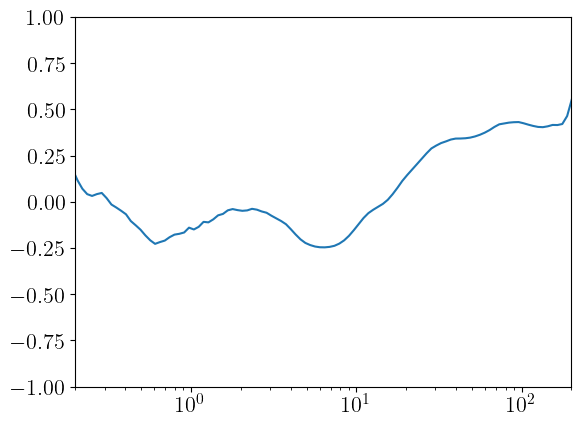

In [24]:
plt.plot(time_fiesta, predict_lc["X-ray-5keV"] - np.interp(time_fiesta, time_afgpy, true_lc["X-ray-5keV"]))
plt.xscale("log")
plt.xlim(0.2, 200)
plt.ylim(-1, 1)

In [13]:
time_fiesta

Array([9.99999975e-05, 1.06984633e-04, 1.14457122e-04, 1.22451529e-04,
       1.31004315e-04, 1.40154487e-04, 1.49943779e-04, 1.60416792e-04,
       1.71621316e-04, 1.83608441e-04, 1.96432826e-04, 2.10152939e-04,
       2.24831354e-04, 2.40534995e-04, 2.57335487e-04, 2.75309430e-04,
       2.94538797e-04, 3.15111247e-04, 3.37120611e-04, 3.60667240e-04,
       3.85858526e-04, 4.12809342e-04, 4.41642565e-04, 4.72489686e-04,
       5.05491334e-04, 5.40798064e-04, 5.78570820e-04, 6.18981896e-04,
       6.62215520e-04, 7.08468840e-04, 7.57952803e-04, 8.10893020e-04,
       8.67530936e-04, 9.28124820e-04, 9.92950983e-04, 1.06230495e-03,
       1.13650307e-03, 1.21588365e-03, 1.30080862e-03, 1.39166531e-03,
       1.48886815e-03, 1.59286009e-03, 1.70411554e-03, 1.82314182e-03,
       1.95048156e-03, 2.08671554e-03, 2.23246496e-03, 2.38839444e-03,
       2.55521503e-03, 2.73368764e-03, 2.92462553e-03, 3.12889996e-03,
       3.34744225e-03, 3.58124892e-03, 3.83138587e-03, 4.09899419e-03,
      

In [25]:
time_afgpy

array([1.40411932e-02, 1.41568767e-02, 1.58757400e-02, 1.97224631e-02,
       3.04123453e-02, 3.28797920e-02, 3.45070514e-02, 3.71940619e-02,
       4.94055604e-02, 5.14329476e-02, 6.19065072e-02, 6.81291005e-02,
       7.56934554e-02, 8.51689286e-02, 8.67267248e-02, 9.13259600e-02,
       1.28427640e-01, 1.48756446e-01, 1.79649495e-01, 1.85733166e-01,
       1.86370376e-01, 2.81539688e-01, 3.02877665e-01, 3.65006239e-01,
       4.05170593e-01, 4.06401830e-01, 4.82670350e-01, 5.27180619e-01,
       5.62441984e-01, 5.77532211e-01, 6.47355349e-01, 6.50929201e-01,
       6.76470840e-01, 7.36857281e-01, 8.13681741e-01, 9.68511221e-01,
       1.17532070e+00, 1.43151294e+00, 1.63142215e+00, 1.74122040e+00,
       2.38948058e+00, 2.80024296e+00, 2.86428188e+00, 3.83268352e+00,
       4.43631062e+00, 5.40617726e+00, 6.09881582e+00, 6.11947138e+00,
       6.66637627e+00, 9.32661706e+00, 1.14250352e+01, 1.25881320e+01,
       1.32156782e+01, 1.49719642e+01, 1.65126943e+01, 1.84340400e+01,
      